In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/Mahin.jpg'

In [ ]:
import cv2
image = cv2.imread("/content/drive/MyDrive/Colab Notebooks/Mahin.jpg")
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

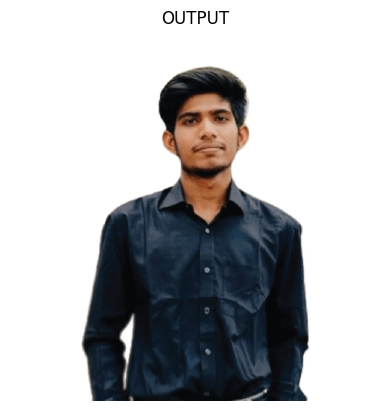

In [ ]:
from matplotlib import pyplot as plt
plt.imshow(image,'gray')
plt.axis("OFF")
plt.title('OUTPUT')
plt.show()

In [ ]:
gray2 = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

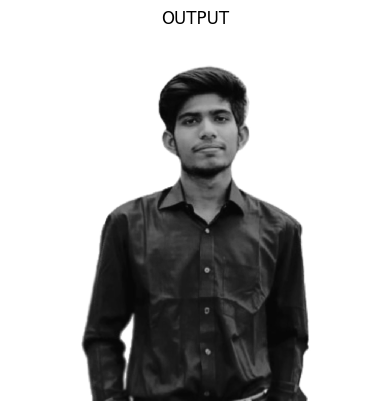

In [ ]:
from matplotlib import pyplot as plt
plt.imshow(gray2,'gray')
plt.axis("OFF")
plt.title('OUTPUT')
plt.show()

In [ ]:
image1 = 1 - image

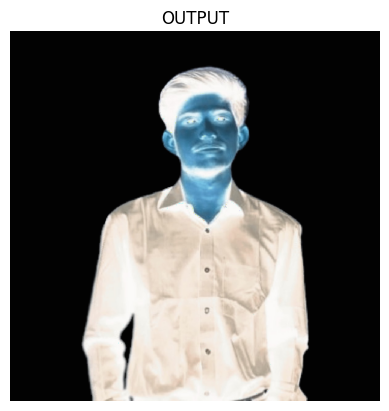

In [ ]:
from matplotlib import pyplot as plt
plt.imshow(image1,'gray')
plt.axis("OFF")
plt.title('OUTPUT')
plt.show()

In [ ]:
import numpy as np
def Convolution(image, kernel):
    im_height, im_width = image.shape
    result = np.zeros((im_height, im_width), dtype="float32")
    n = kernel.shape[0]
    pad = n//2
    for x in range(pad, im_height-pad):
      for y in range(pad, im_width-pad):
        img_crop = image[x-pad:x+pad+1, y-pad:y+pad+1]
        # imf_crop = img_crop[::-1,::-1]
        result[x][y] = np.sum(img_crop*kernel)
    return result


Spatial filtering is a technique used in image processing to enhance or modify the spatial characteristics of an image. There are several types of spatial filtering methods, each designed to achieve specific image processing goals. Some common types of spatial filtering include:

Linear Filtering:

Smoothing Filters: These filters, such as Gaussian and averaging filters, are used to reduce noise and blur images by averaging the pixel values within a local neighborhood.
Sharpening Filters: Sharpening filters, like Laplacian and Sobel filters, enhance edges and fine details in an image by emphasizing the differences in intensity between neighboring pixels.
Edge Detection Filters: Filters like the Sobel, Prewitt, and Roberts operators are specifically designed to detect edges in images by highlighting areas of rapid intensity change.
Non-linear Filtering:

Median Filter: The median filter replaces each pixel value in an image with the median value of the neighboring pixels. It is effective in removing salt-and-pepper noise while preserving edges.
Adaptive Filters: These filters adjust their parameters based on local image characteristics, making them more effective in varying image regions.
Morphological Filtering:

Erosion: Erosion removes small details and objects from images by shrinking the boundaries of foreground objects.
Dilation: Dilation expands the boundaries of objects in an image, making them larger and filling in small holes.
Opening and Closing: Opening is a combination of erosion followed by dilation, while closing is dilation followed by erosion. These operations are used for smoothing, removing noise, and filling gaps in objects.
Frequency Domain Filtering:

Fourier Transform: Images can be transformed into the frequency domain using techniques like the Fourier Transform, where filtering operations are applied to specific frequency components to achieve desired effects like blurring or sharpening.

<ipython-input-75-59a92ea9f61f>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


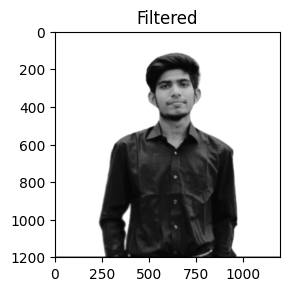

In [ ]:
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Mahin.jpg',cv2.IMREAD_GRAYSCALE)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
result = Convolution(img, kernel)

plt.subplot(1, 2, 2)
plt.imshow(result, cmap='gray')
plt.title('Filtered')


plt.show()

#Mean filer

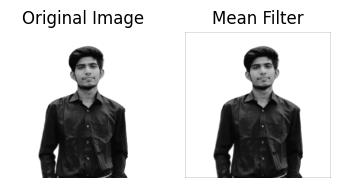

In [ ]:
kernel = np.array(([1/9, 1/9, 1/9],
                [1/9, 1/9, 1/9],
                [1/9, 1/9, 1/9]), np.float32)

result = Convolution(img, kernel)
plt.subplot(1, 3, 1)
plt.axis("OFF")
plt.imshow(img, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.axis("OFF")
plt.imshow(result, cmap='gray')
plt.title('Mean Filter')


plt.show()

#Median Filter

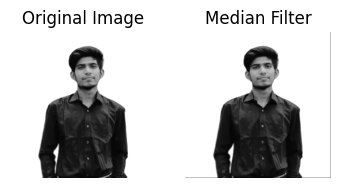

In [ ]:
height, width = img.shape
filter_size = 4
median_result = np.zeros((height, width), dtype='float32')

for x in range(height-2):
    for y in range(width-2):
        arr_list = list()
        arr_list.append(img[x:x+filter_size, y:y+filter_size])
        arr_list = np.array(arr_list)
        arr_list = arr_list.flatten()
        arr_list.sort()
        median_result[x][y] = arr_list[len(arr_list)//2]

plt.subplot(1, 3, 1)
plt.axis("OFF")
plt.imshow(img, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.axis("OFF")
plt.imshow(median_result, cmap='gray')
plt.title('Median Filter')


plt.show()

#Laplace Filter

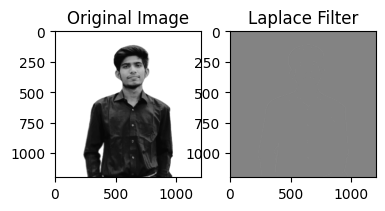

In [ ]:
height, width = img.shape
kernel = np.array([[0, -1, 0], [-1, 4, -1], [0, -1, 0]])
laplace_img = np.zeros((height, width))
laplace_img = Convolution(img, kernel)

plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(laplace_img, cmap='gray')
plt.title('Laplace Filter')


plt.show()

#Sobel Filter

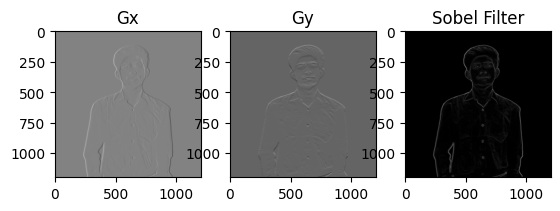

In [ ]:
height, width = img.shape
horizontal_mask = np.array([[1, 0, -1],
                            [2, 0, -2],
                            [1, 0, -1]])
vertical_mask = np.array([[1, 2, 1],
                          [0, 0, 0],
                          [-1, -2, -1]])

st = horizontal_mask.shape[0]//2
ed = horizontal_mask.shape[1]//2
Gx = np.zeros((height, width))
Gy = np.zeros((height, width))

for row in range(st, height-st):
  for col in range(ed, width-ed):
    Gx[row, col] = np.sum(img[row-st:row+st+1, col-ed:col+ed+1] * horizontal_mask)

for row in range(st, height-st):
  for col in range(ed, width-ed):
    Gy[row, col] = np.sum(img[row-st:row+st+1, col-ed:col+ed+1] * vertical_mask)

G = np.sqrt(Gx**2 + Gy**2)

plt.subplot(1, 3, 1)
plt.imshow(Gx, cmap='gray')
plt.title('Gx')

plt.subplot(1, 3, 2)
plt.imshow(Gy, cmap='gray')
plt.title('Gy')


plt.subplot(1, 3, 3)
plt.imshow(G, cmap='gray')
plt.title('Sobel Filter')


plt.show()

#Prewit Filter

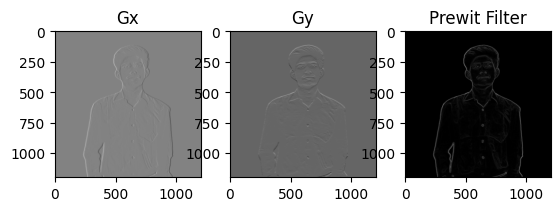

In [ ]:
height, width = img.shape
horizontal_mask = np.array([[1, 0, -1],
                            [1, 0, -1],
                            [1, 0, -1]])
vertical_mask = np.array([[1, 1, 1],
                          [0, 0, 0],
                          [-1, -1, -1]])
st = horizontal_mask.shape[0]//2
ed = horizontal_mask.shape[1]//2
Gx = np.zeros((height, width))
Gy = np.zeros((height, width))

for row in range(st, height-st):
  for col in range(ed, width-ed):
    Gx[row, col] = np.sum(img[row-st:row+st+1, col-ed:col+ed+1] * horizontal_mask)

for row in range(st, height-st):
  for col in range(ed, width-ed):
    Gy[row, col] = np.sum(img[row-st:row+st+1, col-ed:col+ed+1] * vertical_mask)

G = np.sqrt(Gx**2 + Gy**2)

plt.subplot(1, 3, 1)
plt.imshow(Gx, cmap='gray')
plt.title('Gx')

plt.subplot(1, 3, 2)
plt.imshow(Gy, cmap='gray')
plt.title('Gy')


plt.subplot(1, 3, 3)
plt.imshow(G, cmap='gray')
plt.title('Prewit Filter')


plt.show()

#Robert Filter

Text(0.5, 1.0, 'Robert Filter')

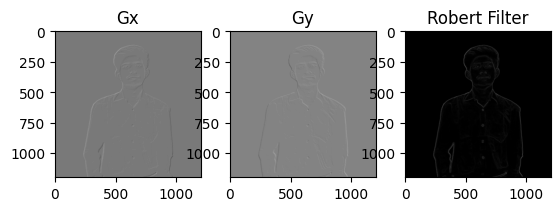

In [ ]:

height, width = img.shape

horizontal_mask = np.array([[1, 0], [0, -1]])
vertical_mask = np.array([[0, 1], [-1, 0]])

st = horizontal_mask.shape[0]//2
ed = horizontal_mask.shape[1]//2
Gx = np.zeros((height, width))
Gy = np.zeros((height, width))

for row in range(st, height-st):
  for col in range(ed, width-ed):
    Gx[row, col] = np.sum(img[row-st:row+st, col-ed:col+ed] * horizontal_mask)

for row in range(st, height-st):
  for col in range(ed, width-ed):
    Gy[row, col] = np.sum(img[row-st:row+st, col-ed:col+ed] * vertical_mask)

G = np.sqrt(Gx**2 + Gy**2)

plt.subplot(1, 3, 1)
plt.imshow(Gx, cmap='gray')
plt.title('Gx')

plt.subplot(1, 3, 2)
plt.imshow(Gy, cmap='gray')
plt.title('Gy')


plt.subplot(1, 3, 3)
plt.imshow(G, cmap='gray')
plt.title('Robert Filter')


plt.show()


#Scharr Filter|

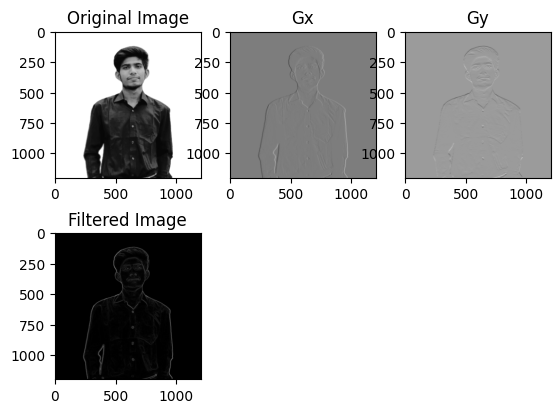

In [ ]:

height, width = img.shape

horizontal_mask = np.array([[-3, 0, 3], [-10, 0, 10], [-3, 0, +3]])
vertical_mask = np.array([[-3, -10, -3], [0, 0, 0], [3, 10, 3]])

st = horizontal_mask.shape[0]//2
ed = horizontal_mask.shape[1]//2
Gx = np.zeros((height, width))
Gy = np.zeros((height, width))

for row in range(st, height-st):
  for col in range(ed, width-ed):
    Gx[row, col] = np.sum(img[row-st:row+st+1, col-ed:col+ed+1] * horizontal_mask)

for row in range(st, height-st):
  for col in range(ed, width-ed):
    Gy[row, col] = np.sum(img[row-st:row+st+1, col-ed:col+ed+1] * vertical_mask)

G = np.sqrt(Gx**2 + Gy**2)

plt.subplot(2, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')


plt.subplot(2, 3, 2)
plt.imshow(Gx, cmap='gray')
plt.title('Gx')


plt.subplot(2, 3, 3)
plt.imshow(Gy, cmap='gray')
plt.title('Gy')


plt.subplot(2, 3, 4)
plt.imshow(G, cmap='gray')
plt.title('Scharr Filtered Image')

plt.show()

#Gaussian Filter

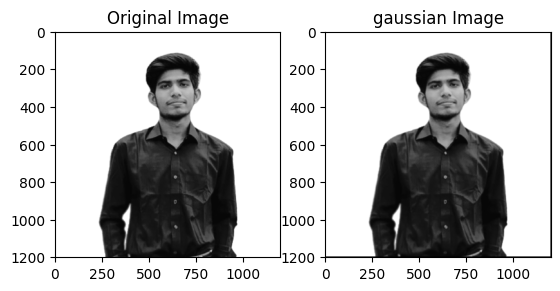

In [ ]:
height, width = img.shape
kernel_size = 7
sigma = (kernel_size - 1) // 6
kernel = np.zeros((kernel_size, kernel_size))
st = kernel.shape[0]//2
ed = kernel.shape[1]//2

import math
def gaussian_filter(x, y, sigma):
  PI = math.pi
  return (1/(2*PI*sigma**2))*math.exp(-(x**2+y**2)/(2*sigma**2))

for i in range(-st, st+1):
  for j in range(-ed, ed+1):
    kernel[i+st][j+ed] = gaussian_filter(i, j, sigma)

gaussian_img = np.zeros((height, width))

for row in range(st, height-st):
  for col in range(ed, width-ed):
    img_portion = img[row-st:row+st+1, col-ed:col+ed+1]
    img_portion = img_portion[::-1, ::-1]
    gaussian_img[row][col] = np.sum(img_portion*kernel)

plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(gaussian_img , cmap='gray')
plt.title('gaussian Image')

plt.show()

#Gamma Transformation

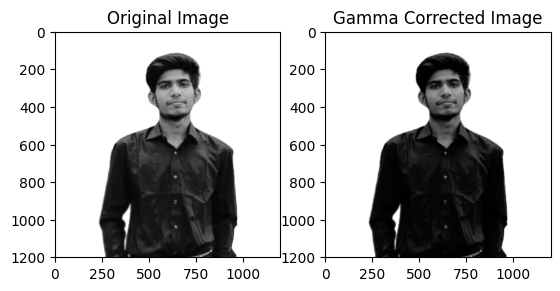

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def gamma_correction(image, gamma):

    normalized_image = image / np.max(image)

    corrected_image = normalized_image ** gamma

    corrected_image = corrected_image * 255
    return corrected_image.astype(np.uint8)

gamma_value = 1.5

gamma_corrected_img = gamma_correction(img, gamma_value)

plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(gamma_corrected_img , cmap='gray')
plt.title('Gamma Corrected Image')

plt.show()


#Log Transformation

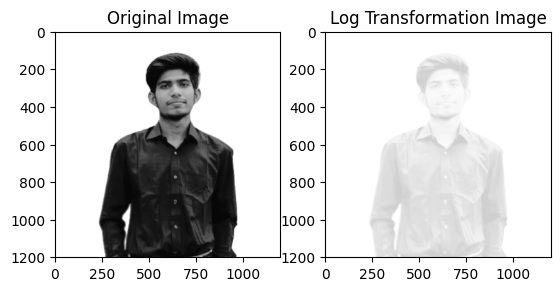

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def log_transformation(image):
    epsilon = 1e-6

    transformed_image = np.log(image + epsilon)

    transformed_image = (transformed_image - np.min(transformed_image)) / (np.max(transformed_image) - np.min(transformed_image))

    transformed_image = transformed_image * 255
    return transformed_image.astype(np.uint8)

log_transformed_img = log_transformation(img)

plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(log_transformed_img , cmap='gray')
plt.title('Log Transformation Image')

plt.show()


#Intensity Transformation

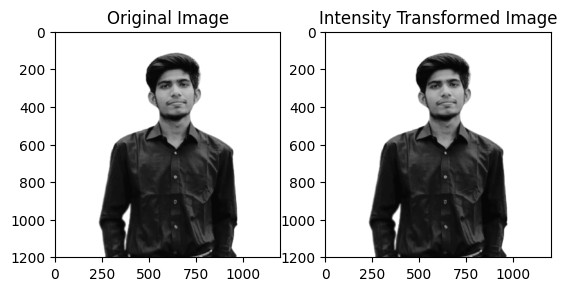

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def linear_intensity_transformation(image, min_intensity, max_intensity):

    normalized_image = (image - np.min(image)) / (np.max(image) - np.min(image))

    transformed_image = (max_intensity - min_intensity) * normalized_image + min_intensity
    return transformed_image.astype(np.uint8)


min_intensity = 50
max_intensity = 200


transformed_img = linear_intensity_transformation(img, min_intensity, max_intensity)


plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(transformed_img, cmap='gray')
plt.title('Intensity Transformed Image')

plt.show()


#Histogram Equalization

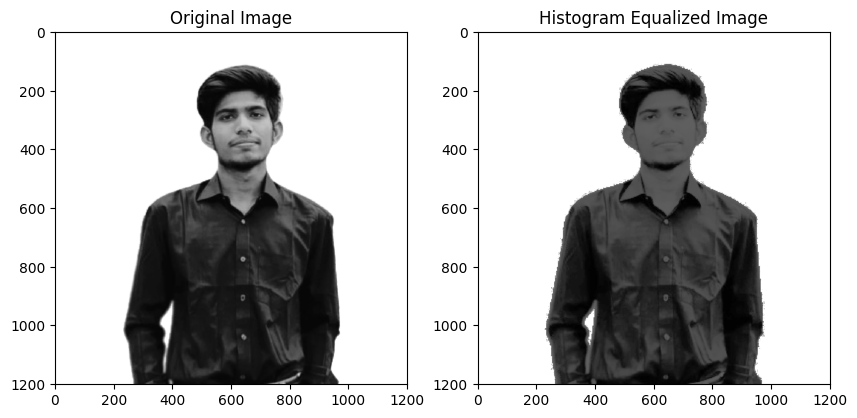

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def histogram_equalization(image):

    histogram, _ = np.histogram(image.flatten(), bins=256, range=(0,256))
    cdf = histogram.cumsum()
    cdf_normalized = cdf / cdf[-1]
    equalized_image = np.interp(image.flatten(), range(256), cdf_normalized * 255).reshape(image.shape)
    return equalized_image.astype(np.uint8)

equalized_img = histogram_equalization(img)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(equalized_img, cmap='gray')
plt.title('Histogram Equalized Image')

plt.show()


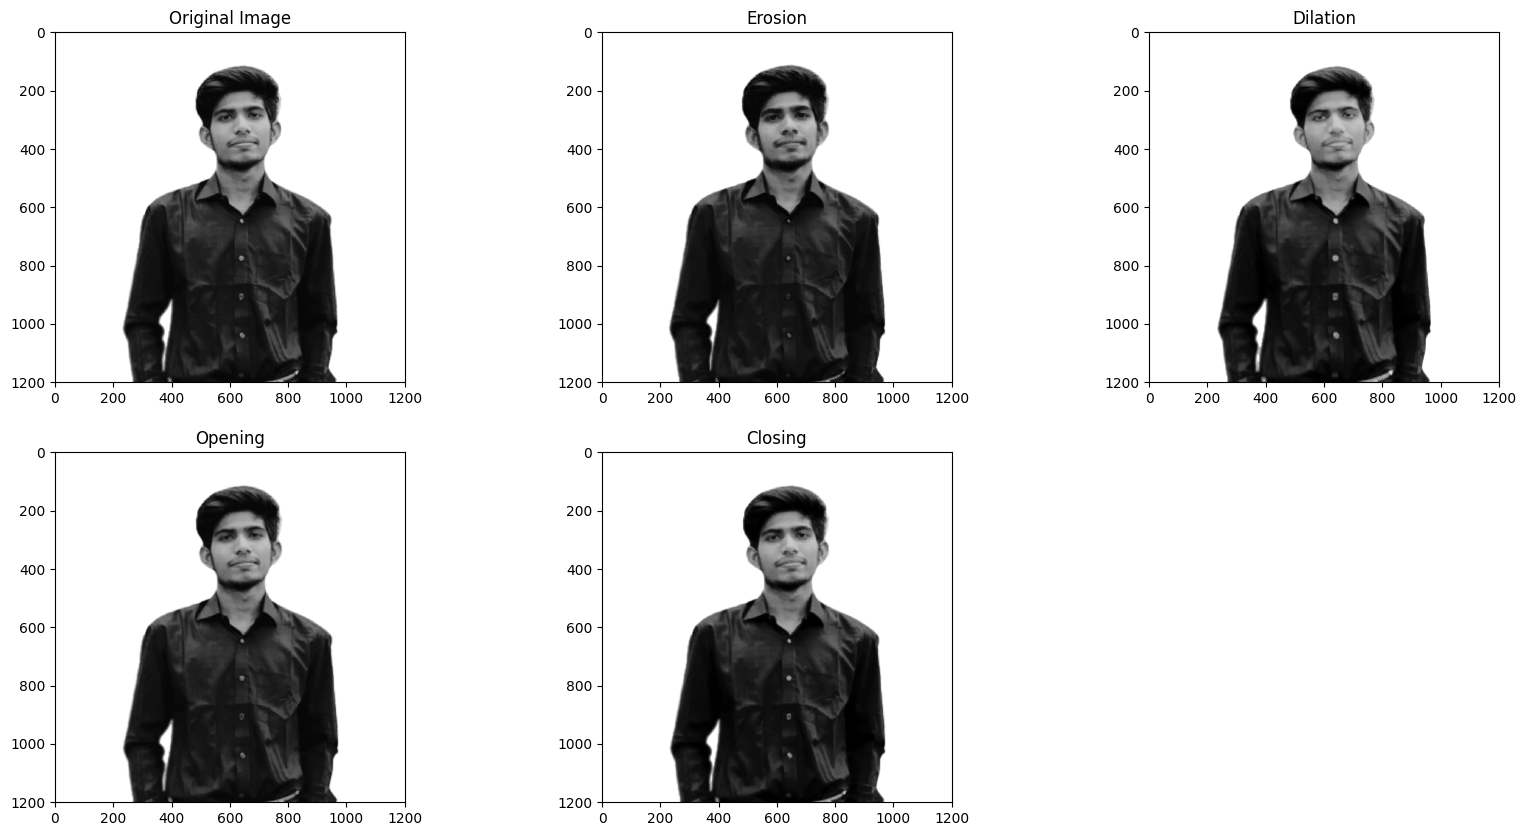

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Mahin.jpg', 0)

kernel = np.ones((5, 5), np.uint8)

erosion_img = cv2.erode(img, kernel, iterations=1)

dilation_img = cv2.dilate(img, kernel, iterations=1)

opening_img = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)

closing_img = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)

plt.figure(figsize=(20, 10))

plt.subplot(2, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')

plt.subplot(2, 3, 2)
plt.imshow(erosion_img, cmap='gray')
plt.title('Erosion')

plt.subplot(2, 3, 3)
plt.imshow(dilation_img, cmap='gray')
plt.title('Dilation')

plt.subplot(2, 3, 4)
plt.imshow(opening_img, cmap='gray')
plt.title('Opening')

plt.subplot(2, 3, 5)
plt.imshow(closing_img, cmap='gray')
plt.title('Closing')

plt.show()
